In [1]:
import os.path
homedir = os.path.expanduser("~")
kaggle_home_dir = homedir + "/.kaggle"
kaggle_file = "kaggle.json"

kaggle_file = os.path.join(kaggle_home_dir, kaggle_file)
print(kaggle_file, type(kaggle_file), kaggle_file == '/home/iid/.kaggle/kaggle.json')

#!cat {kaggle_file}
#!pip install kaggle

!mkdir {kaggle_home_dir}
# !echo '{"username":"michalgasiorowski","key":"64ed31a01f3f866630e66b5427dd6682"}' > /root/.kaggle/kaggle.json
#!echo '{"username":"michalgasiorowski","key":"64ed31a01f3f866630e66b5427dd6682"}' >  '/home/iid/.kaggle/kaggle.json'



C:\Users\michal/.kaggle\kaggle.json <class 'str'> False


The syntax of the command is incorrect.


In [7]:
os.path.curdir
data_path = os.path.join(os.path.curdir, '../../data/titanic')
print(data_path)

.\../../data/titanic


In [12]:
!kaggle competitions download -c titanic --path $data_path --force
!unzip $data_path/titanic.zip -d $data_path


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<00:00, 1.94MB/s]


Archive:  .\../../data/titanic/titanic.zip
  inflating: .\../../data/titanic/gender_submission.csv  
  inflating: .\../../data/titanic/test.csv  
  inflating: .\../../data/titanic/train.csv  


In [2]:
# ! conda install -c anaconda seaborn 
import seaborn as sns

In [3]:
!ls

Ch3-Classification.ipynb
Classification3-a-MNIST.ipynb
Classification3-b-shift-MNIST.ipynb
Classification3-c-Titanic.ipynb
Housing.ipynb
forest_reg.pkl


In [14]:
import os
import pandas as pd

def load_titanic_dateset(titanic_path='/content'):
  gender_submission_csv_path = os.path.join(titanic_path, "gender_submission.csv")
  train_csv_path = os.path.join(titanic_path, "train.csv")
  test_csv_path = os.path.join(titanic_path, "test.csv")
  return pd.read_csv(gender_submission_csv_path), pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)
  #return pd.read_csv


In [15]:
#gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path='/home/iid/PycharmProjects/ml-playground/data/titanic/')
#gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path='/home/iid/PycharmProjects/ml-playground/data/titanic/')
gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path=data_path)



In [16]:
train_df.describe(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  , None)

In [17]:
train_df["Ticket"].value_counts()

CA. 2343           7
1601               7
347082             7
347088             6
CA 2144            6
                  ..
349249             1
SOTON/OQ 392086    1
335677             1
C.A. 6212          1
6563               1
Name: Ticket, Length: 681, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002307A7D8308>,
      dtype=object)

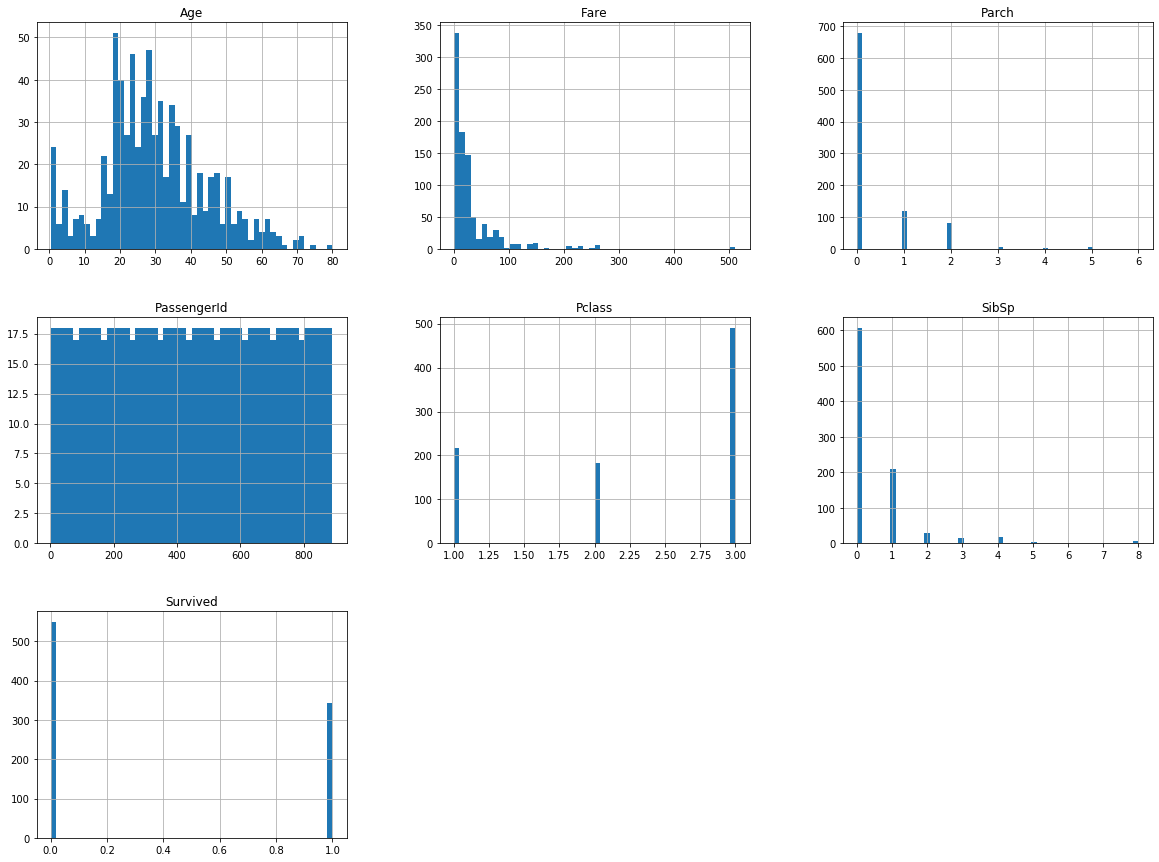

In [18]:
import matplotlib.pyplot as plt

train_df.hist(bins=50, figsize=(20,15))

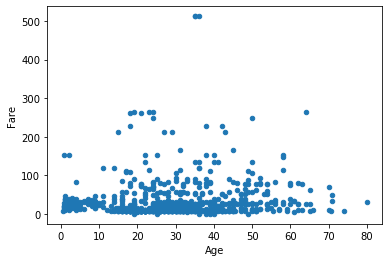

In [8]:
train_df.plot(kind="scatter", x="Age", y="Fare")

In [9]:
corr_matrix = train_df.corr()


In [10]:
# Survival is correlated to Fare price :) No shit sherlock :)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b4f188d68>,
      dtype=object)

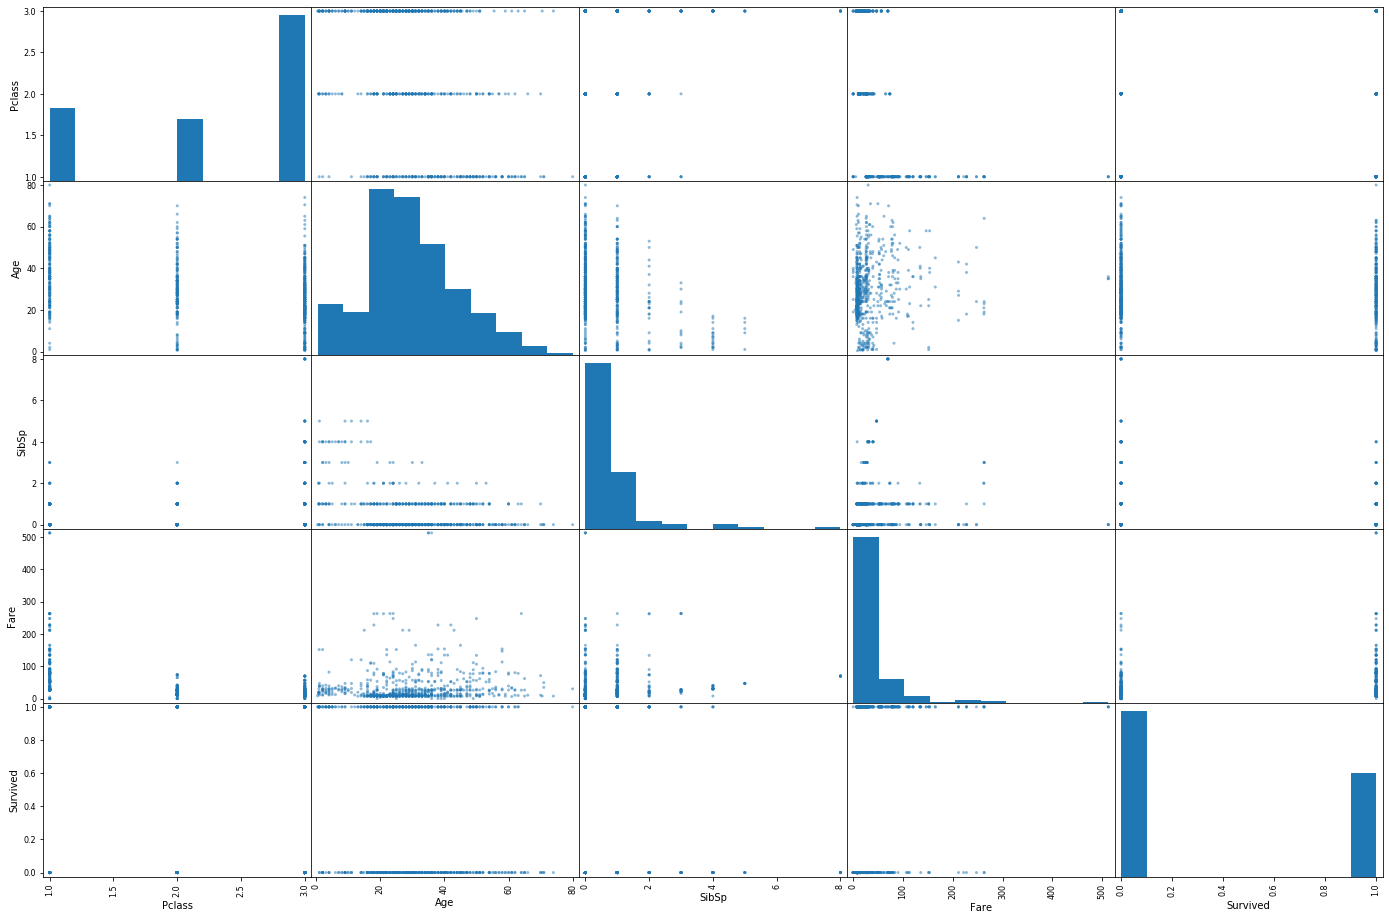

In [12]:
# PassengerId    891 non-null int64
# Survived       891 non-null int64
# Pclass         891 non-null int64
# Name           891 non-null object
# Sex            891 non-null object
# Age            714 non-null float64
# SibSp          891 non-null int64
# Parch          891 non-null int64
# Ticket         891 non-null object
# Fare           891 non-null float64
# Cabin          204 non-null object
# Embarked       889 non-null object

from pandas.plotting import scatter_matrix

attributes = ["Pclass", "Sex", "Age", "SibSp", "Fare", "Survived" ]
scatter_matrix(train[attributes], figsize=(24, 16))


In [20]:
#train_df_data = train_df.drop("Survived", axis=1)
#train_df_labels = train_df["Survived"].copy()

NameError: name 'train' is not defined

In [21]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# Categorical Attributes
# Missing Values
# Numerical attributes

nummerical_attributes = []
categorical_attributes = ["Pclass", "Sex", "Embarked"]
to_drop_attributes = ["Ticket", "Name"]

In [0]:
train.set_index("PassengerId", inplace=True)

In [22]:
train.head()

NameError: name 'train' is not defined

In [23]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [42]:
#sns.barplot(x='Pclass', y='Survived', data=train_df)
train_df['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [176]:
#train_df_prep = None
#test_df_prep = None
train_df_prep, test_df_prep = copy_data_to_prep()

In [179]:
train_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [134]:
def copy_data_to_prep():
    train_df_prep, test_df_prep = train_df.copy(), test_df.copy()
    return train_df_prep, test_df_prep

In [173]:
def get_train_test_datests():
    return train_df_prep, test_df_prep

In [187]:
# Drop id for training dataset, we are not interested in PassengerId
def dropPassengerId(train_df_prep):
    train_df_prep = train_df_prep.drop(["PassengerId"], axis=1)
    return train_df_prep
#data_prep

In [188]:
#train_df_prep["Cabin"].value_counts()
import re

def cabin_preprocessing(train_df_prep, test_df_prep):
    deckS = "ABCDEFGU"
    deckNum = "12345678"
    deckMap = dict(zip(deckS, deckNum))

    reg = re.compile("([a-zA-Z]+)")

    for prep_dataset in get_train_test_datests():
        prep_dataset["Cabin"] = prep_dataset["Cabin"].fillna("UO")
        prep_dataset["Deck"] = prep_dataset["Cabin"].map(lambda x: reg.search(x).group())
        prep_dataset["Deck"] = prep_dataset["Deck"].map(deckMap)
        prep_dataset["Deck"] = prep_dataset["Deck"].fillna(0)
        prep_dataset["Deck"] = prep_dataset["Deck"].astype(int)

    train_df_prep = train_df_prep.drop(['Cabin'], axis=1)  
    test_df_prep = test_df_prep.drop(['Cabin'], axis=1)  

    return train_df_prep, test_df_prep
#train_df_prep["Deck"].value_counts(), test_df_prep["Deck"].value_counts()

In [228]:
from sklearn.preprocessing import OrdinalEncoder

def sex_preprocessing(train_df_prep=train_df_prep, test_df_prep=test_df_prep):
    sex_category_mapping = {"male" : 0, "female" : 1}

    for prep_dataset in get_train_test_datests():
        sex_encoder = OrdinalEncoder(dtype=numpy.int32)
        prep_dataset[["Sex"]] = sex_encoder.fit_transform(prep_dataset[["Sex"]])
        prep_dataset["Sex"] = prep_dataset["Sex"].astype('category')
        #prep_dataset['Sex'] = prep_dataset['Sex'].map(sex_category_mapping)
    return train_df_prep, test_df_prep

In [158]:
# Age - fill missing values
# Use SimpleImputer

import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

def age_preprocessing(train_df_prep=train_df_prep, test_df_prep=test_df_prep):
    for prep_dataset in get_train_test_datests():
        #imputer = KNNImputer(n_neighbors=2, weights="uniform")
        age_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_dataset[["Age"]] = age_imputer.fit_transform(prep_dataset[["Age"]])
        prep_dataset["Age"] = prep_dataset["Age"].astype(int)
    return train_df_prep, test_df_prep

In [243]:
# Combine SibSp and Parch
def relatives_preprocessing(train_df_prep=train_df_prep, test_df_prep=test_df_prep):
    for prep_dataset in get_train_test_datests():
        #imputer = KNNImputer(n_neighbors=2, weights="uniform")
        prep_dataset["Relatives"] = prep_dataset["SibSp"] + prep_dataset['Parch']
        prep_dataset.loc[prep_dataset['Relatives'] > 0, 'alone'] = 0
        prep_dataset.loc[prep_dataset['Relatives'] == 0, 'alone'] = 1
        #prep_dataset['alone'] = prep_dataset['alone'].astype(int)
        prep_dataset["alone"] = prep_dataset["alone"].astype('category')
    
    train_df_prep = train_df_prep.drop(['SibSp'], axis=1)
    train_df_prep = train_df_prep.drop(['Parch'], axis=1)
    test_df_prep = test_df_prep.drop(['SibSp'], axis=1)  
    test_df_prep = test_df_prep.drop(['Parch'], axis=1)
    
    return train_df_prep, test_df_prep

In [241]:
# Embarked - fill missing values with median
# Use SimpleImputer 'most_frequent'

import numpy as np

from sklearn.impute import SimpleImputer

def embarked_preprocessing(train_df_prep=train_df_prep, test_df_prep=test_df_prep):
    for prep_dataset in get_train_test_datests():
        embarked_imputer = SimpleImputer(strategy='most_frequent')
        embarked_encoder = OrdinalEncoder(dtype=numpy.int32)
        prep_dataset[["Embarked"]] = embarked_imputer.fit_transform(prep_dataset[["Embarked"]])
        prep_dataset[["Embarked"]] = embarked_encoder.fit_transform(prep_dataset[["Embarked"]])
        prep_dataset["Embarked"] = prep_dataset["Embarked"].astype('category')
        
    return train_df_prep, test_df_prep

In [242]:
# Fare - fill missing values with median

import numpy as np

from sklearn.impute import SimpleImputer

def fare_preprocessing(train_df_prep=train_df_prep, test_df_prep=test_df_prep):
    for prep_dataset in get_train_test_datests():
        prep_dataset["Fare"] = prep_dataset["Fare"].fillna(0)
        prep_dataset["Fare"] = prep_dataset["Fare"].astype(int)

    return train_df_prep, test_df_prep

In [220]:
# Ticket - drop the ticket

import numpy as np

from sklearn.impute import SimpleImputer

def ticket_preprocessing(train_df_prep=train_df_prep, test_df_prep=test_df_prep):
    train_df_prep = train_df_prep.drop(["Ticket"], axis=1)
    test_df_prep = test_df_prep.drop(["Ticket"], axis=1)
        
    return train_df_prep, test_df_prep

In [237]:
# PClass - make it categorical

import numpy as np

from sklearn.impute import SimpleImputer

def pclass_preprocessing(train_df_prep=train_df_prep, test_df_prep=test_df_prep):
    for prep_dataset in get_train_test_datests():
        prep_dataset["Pclass"] = prep_dataset["Pclass"].astype('category')
        
    return train_df_prep, test_df_prep

In [259]:
# Name - drop

import numpy as np

from sklearn.impute import SimpleImputer

def name_preprocessing(train_df_prep=train_df_prep, test_df_prep=test_df_prep):
    train_df_prep = train_df_prep.drop(["Name"], axis=1)
    test_df_prep = test_df_prep.drop(["Name"], axis=1)
    #for prep_dataset in get_train_test_datests():
    #    prep_dataset["Pclass"] = prep_dataset["Pclass"].astype('category')
        
    return train_df_prep, test_df_prep

In [264]:
def drop_survived(train_df_prep, test_df_prep):
    X_train = train_df_prep.drop(["Survived"], axis=1) 
    y_train = train_df_prep["Survived"]
    X_test = test_df_prep.drop(["PassengerId"], axis=1).copy()
    return X_train, y_train, X_test

In [261]:
train_df_prep[["Name"]].sample(10)
#test_df_prep['Embarked'].value_counts()

KeyError: "None of [Index(['Name'], dtype='object')] are in the [columns]"

In [262]:
train_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Pclass       891 non-null category
Sex          891 non-null category
Age          891 non-null int32
Fare         891 non-null int32
Embarked     891 non-null category
Deck         891 non-null int32
Relatives    891 non-null int64
alone        891 non-null category
dtypes: category(4), int32(3), int64(2)
memory usage: 28.4 KB


c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


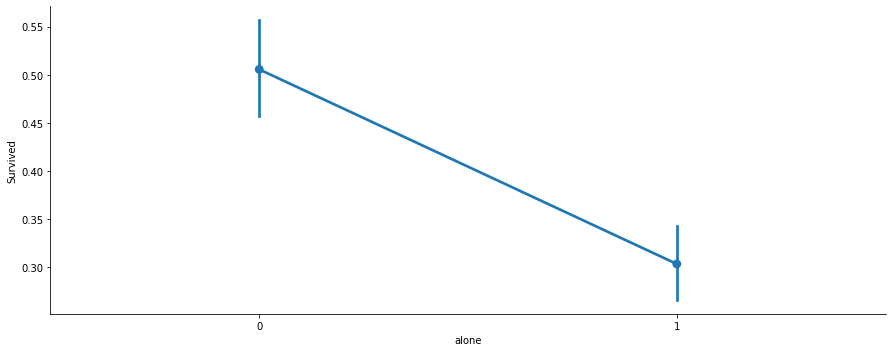

In [152]:
axes = sns.factorplot('alone','Survived', 
                      data=train_df_prep, aspect = 2.5, )

In [265]:
train_df_prep, test_df_prep = copy_data_to_prep()
train_df_prep = dropPassengerId(train_df_prep)
train_df_prep, test_df_prep = cabin_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = sex_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = age_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = relatives_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = embarked_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = fare_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = ticket_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = pclass_preprocessing(train_df_prep, test_df_prep)
train_df_prep, test_df_prep = name_preprocessing(train_df_prep, test_df_prep)

X_train, y_train, X_test = drop_survived(train_df_prep, test_df_prep)


In [268]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier()

sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

print("acc_sgd: {}".format(sgd.score(X_train, y_train) * 100))

acc_sgd: 76.5432098765432


In [233]:
#list(prep_dataset.select_dtypes(include ='float64'))
#prep_dataset["Sex"] = prep_dataset["Sex"].astype(int)
train_df_prep['Pclass'].unique()

array([3, 1, 2], dtype=int64)

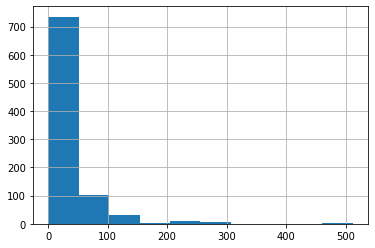

In [208]:
train_df_prep['Fare'].hist()

In [ ]:
X_train = tra

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer')                        
])

In [0]:
from sklearn.compose import ColumnTransformer

nummerical_attributes = 
#num_pipeline 